In [1]:
pip install fbprophet

Source: https://machinelearningmastery.com/time-series-forecasting-with-prophet-in-python/

In [2]:
# check prophet version
import fbprophet
# print version number
print('Prophet %s' % fbprophet.__version__)

Prophet 0.7.1


In [3]:
import pandas as pd
# load the car sales dataset
from pandas import read_csv
# load data
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = read_csv(path, header=0)
# summarize shape
print(df.shape)
# show first few rows
print(df.head())

(108, 2)
     Month  Sales
0  1960-01   6550
1  1960-02   8728
2  1960-03  12026
3  1960-04  14395
4  1960-05  14587


# We can see that as we expected, there are 108 months worth of data and two columns. The first column is the date and the second is the number of sales.

**Load and Plot Dataset
A time-series dataset does not make sense to us until we plot it.**

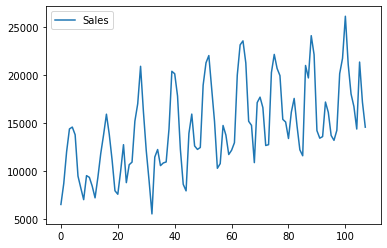

In [4]:
from pandas import read_csv
from matplotlib import pyplot
# load data
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = read_csv(path, header=0)
# plot the time series
df.plot()
pyplot.show()

In [5]:
df

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587
...,...,...
103,1968-08,16722
104,1968-09,14385
105,1968-10,21342
106,1968-11,17180


## Forecast Car Sales With Prophet

In [7]:
# prepare expected column names
df.columns = ['ds', 'y']
df['ds']= pd.to_datetime(df['ds'])

In [9]:
# fit prophet model on the car sales dataset
from pandas import read_csv
from pandas import to_datetime
from fbprophet import Prophet
# load data
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = read_csv(path, header=0)
# prepare expected column names
df.columns = ['ds', 'y']
df['ds']= to_datetime(df['ds'])
# define the model
model = Prophet(weekly_seasonality=True, daily_seasonality=True)
# fit the model
model.fit(df)

# Make an In-Sample Forecast

In [14]:
# define the period for which we want a prediction
future = list()
for i in range(1, 13):
	date = '1968-%02d' % i
	future.append([date])
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])

This DataFrame can then be provided to the predict() function to calculate a forecast.

The result of the predict() function is a DataFrame that contains many columns. Perhaps the most important columns are the forecast date time (‘ds‘), the forecasted value (‘yhat‘), and the lower and upper bounds on the predicted value (‘yhat_lower‘ and ‘yhat_upper‘) that provide uncertainty of the forecast.

For example, we can print the first few predictions as follows:

In [16]:
forecast = model.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds          yhat    yhat_lower    yhat_upper
0 1968-01-01  14663.419982  13027.348544  16197.328712
1 1968-02-01  15225.666899  13652.795047  16736.742905
2 1968-03-01  20717.827765  19059.829793  22241.265971
3 1968-04-01  23264.520345  21739.071186  24669.683430
4 1968-05-01  24695.490912  23293.763310  26278.397597


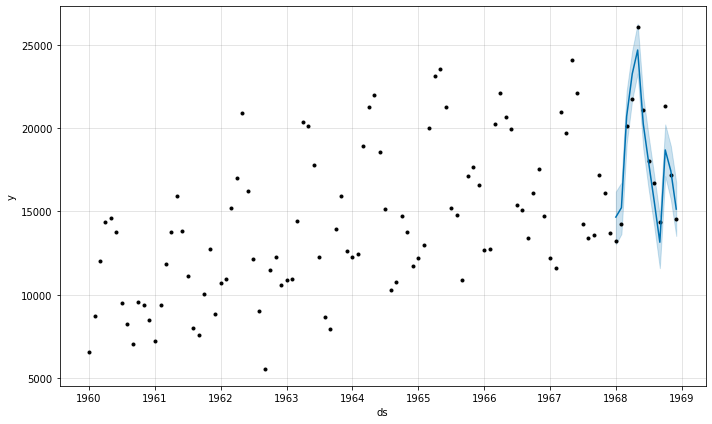

In [17]:
# plot forecast
model.plot(forecast)
pyplot.show()

## This Forecast Machine Learning Model shows the sales likely to happen between 1968 and 1969